# **Redes Neurais Profundas**
Comparação de redes neurais profundas com SIGMOIDE e com RELU, demonstrando a deficiência de aprendizado de redes profundas utilizando funções de ativaçao sigmoidais e a restauração da eficiência quando utilizadas funções de ativação ReLU

### **Importando Libs**

In [4]:
from tensorflow import random
from tensorflow.keras import layers, models, optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Importando os dados**



In [5]:
df = pd.read_excel("/content/sample_data/teste00.xlsx")
print(df)

     x1   x2   y  tt
0   0.0  0.0   0  tr
1   0.0  2.0   2  tr
2   0.0  4.0   4  tr
3   0.0  6.0   6  tr
4   2.0  0.0   2  tr
5   2.0  2.0   4  tr
6   2.0  4.0   6  tr
7   2.0  6.0   8  tr
8   4.0  0.0   4  tr
9   4.0  2.0   6  tr
10  4.0  4.0   8  tr
11  4.0  6.0  10  tr
12  6.0  0.0   6  tr
13  6.0  2.0   8  tr
14  6.0  4.0  10  tr
15  6.0  6.0  12  tr
16  1.0  1.0   2   v
17  1.0  3.0   4   v
18  1.0  5.0   6   v
19  3.0  1.0   4   v
20  3.0  3.0   6   v
21  3.0  5.0   8   v
22  5.0  1.0   6   v
23  5.0  3.0   8   v
24  5.0  5.0  10   v
25  1.5  1.5   3  tt
26  1.5  2.5   4  tt
27  1.5  3.5   5  tt
28  1.5  4.5   6  tt
29  2.5  1.5   4  tt
30  2.5  2.5   5  tt
31  2.5  3.5   6  tt
32  2.5  4.5   7  tt
33  3.5  1.5   5  tt
34  3.5  2.5   6  tt
35  3.5  3.5   7  tt
36  3.5  4.5   8  tt
37  4.5  1.5   6  tt
38  4.5  2.5   7  tt
39  4.5  3.5   8  tt
40  4.5  4.5   9  tt


### **Extraindo conjuntos de treinamento, validação e teste**

In [8]:
X_train = df.iloc[0:16,0:2].astype(float)
y_train = df.iloc[0:16,2].astype(float)
X_valid = df.iloc[16:25,0:2].astype(float)
y_valid = df.iloc[16:25,2].astype(float)
X_test = df.iloc[25:41,0:2].astype(float)
y_test = df.iloc[25:41,2].astype(float)

In [9]:
print(y_valid)

16     2.0
17     4.0
18     6.0
19     4.0
20     6.0
21     8.0
22     6.0
23     8.0
24    10.0
Name: y, dtype: float64


### **Criando os modelos das Redes Neurais Profundas**

In [13]:
seed = 123
random.set_seed(seed)

Sigmoide

In [14]:
model = models.Sequential()

model.add(layers.Dense(10, activation='sigmoid', input_dim=2))

model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))

model.add(layers.Dense(1, activation='linear'))

# Otimizador
model.compile(loss='mse', optimizer='Adam')

#Resumo do Modelo
#model.summary()

ReLU

In [15]:
model2 = models.Sequential()

model2.add(layers.Dense(10, activation='relu', input_dim=2))

model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))

model2.add(layers.Dense(1, activation='linear'))

# Otimizador
model2.compile(loss='mse', optimizer='Adam')

#Resumo do Modelo
#model2.summary()

### **Treinamento**

Modelo com SIGMOIDE

In [16]:
seed = 123
random.set_seed(seed)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_valid, y_valid), shuffle=True, verbose=0)

Modelo com RELU

In [17]:
seed = 123
random.set_seed(seed)
history2 = model2.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_valid, y_valid), shuffle=True, verbose=0)

### **Plotando historicos de treinamento**

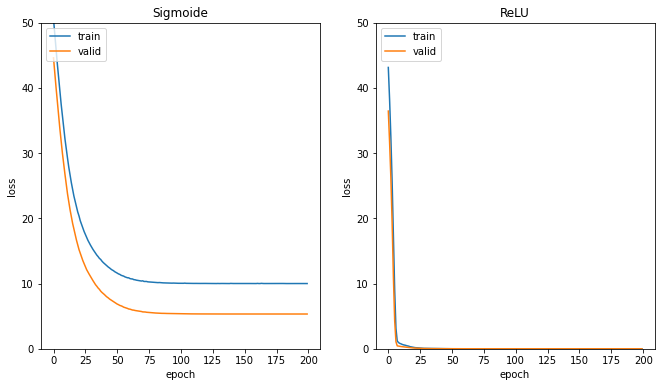

In [19]:
fig = plt.figure(figsize=(11,6))

# Plot Sigmoide
ax1 = fig.add_subplot(121)
ax1.plot(history.history['loss'][0:200])
ax1.plot(history.history['val_loss'][0:200])
plt.title('Sigmoide')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.ylim([0,50])

# Plot ReLU
ax2 = fig.add_subplot(122)
ax2.plot(history2.history['loss'][0:200])
ax2.plot(history2.history['val_loss'][0:200])
plt.title('ReLU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.ylim([0,50])

plt.show()

### **Aplicando a Rede Neural treinada**

Sigmoide

In [20]:
y_pred = model.predict(X_test)

ReLU

In [21]:
y_pred2 = model2.predict(X_test)

### **Medidas de performance**

Erros e correlações

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score #Métricas de Avaliação de Desempenho

res = pd.DataFrame(
    {
        'MAE':[mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred2)],
        'MSE':[mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred2)], 
        'R2_Score': [r2_score(y_test, y_pred), r2_score(y_test, y_pred2)]
    })
res


,MAE,MSE,R2_Score
0,1.252636,2.499615,0.000154
1,0.020708,0.000875,0.999650


**Arrumando os dados para imprimir y_pred e y_test**

In [26]:
y_p = []
y_p2 = []
for i in range(16):
  y_p.append(y_pred[i][0])
  y_p2.append(y_pred2[i][0])
res = pd.DataFrame({'x':range(16),'y_test':y_test, 'y_pred (sig)':y_p, 'y_pred2 (Relu)':y_p2, })
res

,x,y_test,y_pred (sig),y_pred2 (Relu)
25,0,3.0,5.988564,3.005440
26,1,4.0,5.988713,4.030208
27,2,5.0,5.988831,4.992161
28,3,6.0,5.988921,5.992887
29,4,4.0,5.988729,3.995103
30,5,5.0,5.988858,5.008060
31,6,6.0,5.988958,5.964842
32,7,7.0,5.989034,7.012416
33,8,5.0,5.988858,4.982796
34,9,6.0,5.988969,6.027647


**Plotando y_pred e y_test**

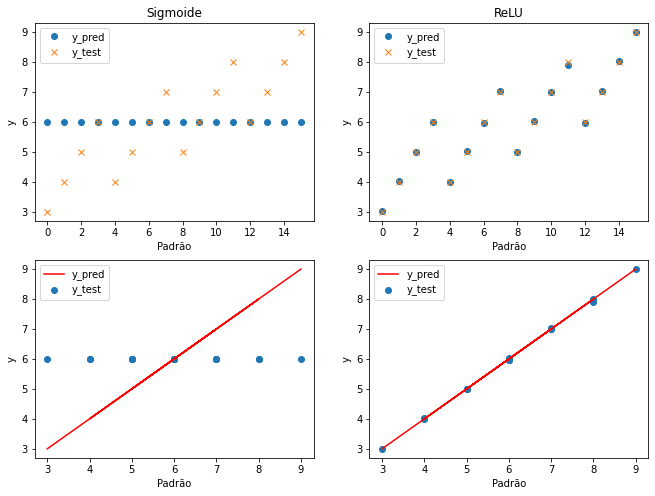

In [31]:
fig = plt.figure(figsize=(11,8))

# Plot Sigmoide
ax1 = fig.add_subplot(221)
ax1.plot(range(16),y_pred, 'o')
ax1.plot(range(16), y_test, 'x')
plt.title('Sigmoide')
plt.ylabel('y')
plt.xlabel('Padrão')
plt.legend(['y_pred', 'y_test'], loc='upper left')

# Plot ReLU
ax2 = fig.add_subplot(222)
ax2.plot(range(16),y_pred2, 'o')
ax2.plot(range(16), y_test, 'x')
plt.title('ReLU')
plt.ylabel('y')
plt.xlabel('Padrão')
plt.legend(['y_pred', 'y_test'], loc='upper left')

# Plot Sigmoide
ax3 = fig.add_subplot(223)
ax3.scatter(y_test,y_pred)
ax3.plot(y_test,y_test,'r')
#plt.title('Sigmoide')
plt.ylabel('y')
plt.xlabel('Padrão')
plt.legend(['y_pred', 'y_test'], loc='upper left')

# Plot ReLU
ax4 = fig.add_subplot(224)
ax4.scatter(y_test,y_pred2)
ax4.plot(y_test,y_test,'r')
#plt.title('ReLU')
plt.ylabel('y')
plt.xlabel('Padrão')
plt.legend(['y_pred', 'y_test'], loc='upper left')

plt.show()

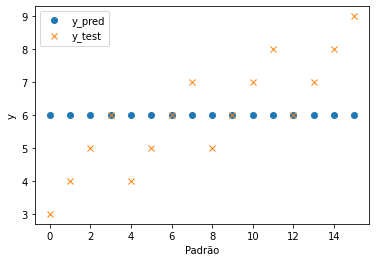

In [82]:
plt.plot(range(16),y_pred, 'o')
plt.plot(range(16), y_test, 'x')
plt.ylabel('y')
plt.xlabel('Padrão')
plt.legend(['y_pred', 'y_test'], loc='upper left')
plt.show()

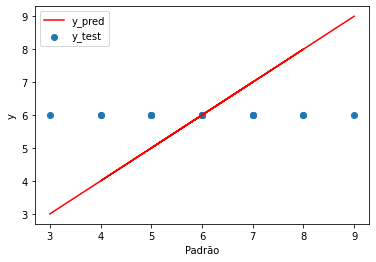

In [84]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.ylabel('y')
plt.xlabel('Padrão')
plt.legend(['y_pred', 'y_test'], loc='upper left')